<a href="https://colab.research.google.com/github/Gilmaralexandre/Classifica-o_de_Textos/blob/main/Classifica%C3%A7%C3%A3o_de_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de texto com avaliações de filmes

- Objetivo deste caderno, é pegar o tutorial do tensorflow, e daí tentar na aprimorar o modelo e ampliar o conhecimento na área de classificação binária com redes neurais.
- Base de dados é a Imdb que é a avaliação de 50000 filmes.

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.9.2


In [ ]:
# Importando a base de dados
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [ ]:
# As avaliações estão com tamanhos diferentes, sendo assim será necessário tratar esses dados
len(train_data[0]), len(train_data[1]), len(train_data[2]), len(train_data[3])

(218, 189, 141, 550)

In [ ]:
# Um dicionário mapeando palavras em índices inteiros
word_index = imdb.get_word_index()

# Os primeiros índices são reservados
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
# Texto em questão
decode_review(train_data[0]) 

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [ ]:
# A fim de padronizar os tamanhos, vou utilizar o pad seguences do keras.processing, e passar o tamanho de 256

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [ ]:
len(train_data[0]), len(train_data[1]), len(train_data[2]), len(train_data[3])

(256, 256, 256, 256)

In [ ]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [ ]:
# O formato de entrada é a contagem vocabulário usados pelas avaliações dos filmes (10000 palavras)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


## Conteúdo de explicação retirado do Tutorial do TensorFlow

As camadas são empilhadas sequencialmente para construir o classificador:

A primeira camada é uma camada Embedding (Embedding layer). Essa camada pega o vocabulário em inteiros e olha o vetor embedding em cada palavra-index. Esses vetores são aprendidos pelo modelo, ao longo do treinamento. Os vetores adicionam a dimensão ao array de saída. As dimensões resultantes são: (batch, sequence, embedding).
Depois, uma camada GlobalAveragePooling1D retorna um vetor de saída com comprimento fixo para cada exemplo fazendo a média da sequência da dimensão. Isso permite o modelo de lidar com entradas de tamanhos diferentes da maneira mais simples possível.
Esse vetor de saída com tamanho fixo passa por uma camada fully-connected (Dense) layer com 16 hidden units.
A última camada é uma densely connected com um único nó de saída. Usando uma função de ativação sigmoid, esse valor é um float que varia entre 0 e 1, representando a probabilidade, ou nível de confiança.
Hidden units
O modelo abaixo tem duas camadas intermediárias ou "hidden" (hidden layers), entre a entrada e saída. O número de saídas (unidades— units—, nós ou neurônios) é a dimensão do espaço representacional para a camada. Em outras palavras, a quantidade de liberdade que a rede é permitida enquanto aprende uma representação interna.

Se o modelo tem mais hidden units (um espaço representacional de maior dimensão), e/ou mais camadas, então a rede pode aprender representações mais complexas. Entretanto, isso faz com que a rede seja computacionalmente mais custosa e pode levar ao aprendizado de padrões não desejados— padrões que melhoram a performance com os dados de treinamento, mas não com os de teste. Isso se chama overfitting, e exploraremos mais tarde.

Função Loss e otimizadores (optimizer)
O modelo precisa de uma função loss e um otimizador (optimizer) para treinamento. Já que é um problema de classificação binário e o modelo tem como saída uma probabilidade (uma única camada com ativação sigmoide), usaremos a função loss binary_crossentropy.

Essa não é a única escolha de função loss, você poderia escolher, no lugar, a mean_squared_error. Mas, geralmente, binary_crossentropy é melhor para tratar probabilidades— ela mede a "distância" entre as distribuições de probabilidade, ou, no nosso caso, sobre a distribuição real e as previsões.

Mais tarde, quando explorarmos problemas de regressão (como, predizer preço de uma casa), veremos como usar outra função loss chamada mean squared error.

Agora, configure o modelo para usar o optimizer a função loss:

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.6921 - accuracy: 0.5502 - val_loss: 0.6903 - val_accuracy: 0.6639
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.6873 - accuracy: 0.7203 - val_loss: 0.6837 - val_accuracy: 0.7058
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.6769 - accuracy: 0.7278 - val_loss: 0.6700 - val_accuracy: 0.7171
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6576 - accuracy: 0.7573 - val_loss: 0.6477 - val_accuracy: 0.7550
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6282 - accuracy: 0.7809 - val_loss: 0.6157 - val_accuracy: 0.7757
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5892 - accuracy: 0.7988 - val_loss: 0.5765 - val_accuracy: 0.7936
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5436 - accuracy: 0.8244 - val_loss: 0.5337 - val_accuracy: 0.8126
Epoch 8/20
30

In [ ]:
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

782/782 - 1s - loss: 0.3095 - accuracy: 0.8742 - 1s/epoch - 2ms/step
[0.3094862401485443, 0.8741599917411804]


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

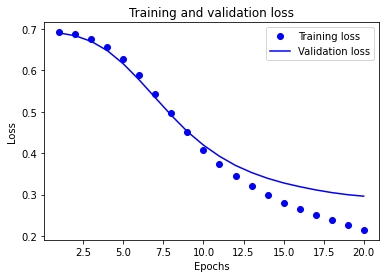

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

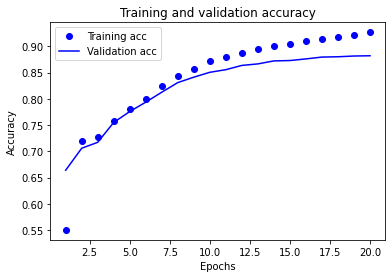

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- Modelo teve boa performance com 20 epocas, no final começa a overfitar, e a perda de validação começa a ficar distante da perda de treino.

## Conclusões Finais, sendo esse um mmodelo experimental, ele pode servir de base para problemas no mundo real, como se um comentário de qualquer plataforma digital é positivo ou não, classificar indicadores, definir possíveis ruídos em algum processo de sua empresa. 